In [1]:
import sys
sys.path.insert(0, '../src/')
from christofides import *
from modularmatrix import ModularMatrix
from integersolution import integer_solution
from toursvisualizer import IntToursVisualizer
import numpy as np

In [2]:
base_distance_matrix=np.array([
   [  0.,  14.,  21.,  27.,  33.,  40.,  59.,  65.,  84.,  87.],
   [ 14.,   0.,  15.,  21.,  27.,  34.,  65.,  71.,  90.,  81.],
   [ 21.,  15.,   0.,  14.,  20.,  27.,  72.,  78.,  85.,  74.],
   [ 27.,  21.,  14.,   0.,  14.,  21.,  78.,  84.,  79.,  68.],
   [ 33.,  27.,  20.,  14.,   0.,  15.,  84.,  90.,  73.,  62.],
   [ 40.,  34.,  27.,  21.,  15.,   0.,  91.,  85.,  66.,  55.],
   [ 59.,  65.,  72.,  78.,  84.,  91.,   0.,  14.,  33.,  46.],
   [ 65.,  71.,  78.,  84.,  90.,  85.,  14.,   0.,  27.,  40.],
   [ 84.,  90.,  85.,  79.,  73.,  66.,  33.,  27.,   0.,  21.],
   [ 87.,  81.,  74.,  68.,  62.,  55.,  46.,  40.,  21.,   0.]])

In [3]:
m = 5  # number of robots
p = 12  # number of floors
connections = [10]*p
tours = integer_solution(base_distance_matrix, m, p, connections)

In [4]:
modular_matrix = ModularMatrix(base_distance_matrix, connections, p)
vis = IntToursVisualizer(tours, modular_matrix)

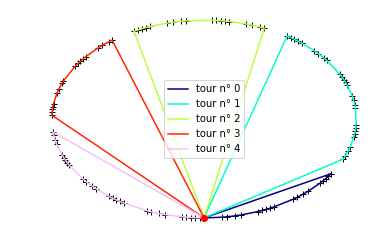

In [5]:
vis.draw()